## VIA508 Mini Exam 1
## Eylül Bulut Fıçıcı

1a) Clearly define decision variables, objective function and constraints.

In [1]:
from pulp import *

prob = LpProblem("Sunco_Model",LpMaximize)

x1 = LpVariable("AviationFuelSoldAfterDistillation", 0)
x2 = LpVariable("HeatingOilSoldAfterDistillation", 0)
x3 = LpVariable("AviationFuelSoldAfterCatalyticCracker", 0)
x4 = LpVariable("HeatingOilSoldAfterCatalyticCracker", 0)
x5 = LpVariable("PurchasedOil", 0)

# objective 
prob += 60*x1+40*x2+130*x3+90*x4-40*x5

# constraints 
prob += x1 + x3 == 0.5*x5, "Barrels_Aviation_Fuel"
prob += x2 + x4 == 0.5*x5, "Barrels_Heating_Oil"
prob += x5 <= 20000, "Barrels_Oil"
prob += 0.001*x3 + 0.00075*x4 <= 8, "Hours_Cracker_Time"

1b) Solve the problem using PULP and report the code and output.

In [2]:
prob.solve()
print("Status:", LpStatus[prob.status])

for v in prob.variables():
    print(v.name, "=", v.varValue)

print("Total Profit of the Process = ", value(prob.objective))

Status: Optimal
AviationFuelSoldAfterCatalyticCracker = 8000.0
AviationFuelSoldAfterDistillation = 2000.0
HeatingOilSoldAfterCatalyticCracker = 0.0
HeatingOilSoldAfterDistillation = 10000.0
PurchasedOil = 20000.0
Total Profit of the Process =  760000.0


1c) Is it profitable to buy an extra barrel of oil? 

In [3]:
import pandas as pd

print("\nSensitivity Analysis")
Cons_Sensitivity_Report=[{'Constraint_Name':name,'Slack':c.slack,"Shadow_Price":c.pi}
                         for name, c in prob.constraints.items()]
print(pd.DataFrame(Cons_Sensitivity_Report))
print("\n")
Variable_Sensitivity_Report = [{'Variable_Name': v.name, 'Value':v.varValue,'Reduced_Cost': v.dj}
                               for v in prob.variables()]

print(pd.DataFrame(Variable_Sensitivity_Report)[['Variable_Name','Value','Reduced_Cost']])


Sensitivity Analysis
         Constraint_Name  Slack  Shadow_Price
0  Barrels_Aviation_Fuel   -0.0          60.0
1    Barrels_Heating_Oil   -0.0          40.0
2            Barrels_Oil   -0.0          10.0
3     Hours_Cracker_Time   -0.0       70000.0


                           Variable_Name    Value  Reduced_Cost
0  AviationFuelSoldAfterCatalyticCracker   8000.0           0.0
1      AviationFuelSoldAfterDistillation   2000.0           0.0
2    HeatingOilSoldAfterCatalyticCracker      0.0          -2.5
3        HeatingOilSoldAfterDistillation  10000.0           0.0
4                           PurchasedOil  20000.0           0.0


1d) How would Sunco’s profit change if they were able to purchase an extra barrel
of oil?

    Shadow price of the Barrels_Oil constraint is $10 so its profitable, it will increase the total profit by $10.
    
1e) How would Sunco’s profit change if they were able to have an extra hour of
cracker time?
    
    Shadow price of the Hours_Cracker_Time constraint is $70000 so its profitable, it will increase the total profit by $70000.

2a) Clearly define decision variables, objective function and constraints.

In [4]:
from pulp import *

prob = LpProblem("PM_Computers_Model",LpMinimize)

# variables

x1 = LpVariable("RegularProduction1", 0)
x2 = LpVariable("RegularProduction2", 0)
x3 = LpVariable("RegularProduction3", 0)
x4 = LpVariable("RegularProduction4", 0)
x5 = LpVariable("RegularProduction5", 0)
x6 = LpVariable("RegularProduction6", 0)
y1 = LpVariable("OvertimeProduction1", 0)
y2 = LpVariable("OvertimeProduction2", 0)
y3 = LpVariable("OvertimeProduction3", 0)
y4 = LpVariable("OvertimeProduction4", 0)
y5 = LpVariable("OvertimeProduction5", 0)
y6 = LpVariable("OvertimeProduction6", 0)
z1 = LpVariable("InventoryComputers1", 0)
z2 = LpVariable("InventoryComputers2", 0)
z3 = LpVariable("InventoryComputers3", 0)
z4 = LpVariable("InventoryComputers4", 0)
z5 = LpVariable("InventoryComputers5", 0)



prob += 190*(x1+x2+x3+x4+x5+x6)+260*(y1+y2+y3+y4+y5+y6)+10*(z1+z2+z3+z4+z5)



#constraints

prob += x1 + y1 - z1 == 105, "Week_1" 
prob += x2 + y2 + z1 - z2 == 170, "Week_2"
prob += x3 + y3 + z2 - z3 == 230, "Week_3" 
prob += x4 + y4 + z3 - z4 == 180, "Week_4" 
prob += x5 + y5 + z4 - z5 == 150, "Week_5" 
prob += x6 + y6 + z5 == 250, "Week_6" 
prob += x1 <= 160, "Week_1_Regular_Capacity"
prob += x2 <= 160, "Week_2_Regular_Capacity"
prob += x3 <= 160, "Week_3_Regular_Capacity"
prob += x4 <= 160, "Week_4_Regular_Capacity"
prob += x5 <= 160, "Week_5_Regular_Capacity"
prob += x6 <= 160, "Week_6_Regular_Capacity"
prob += y1 <= 50, "Week_1_Overtime_Capacity"
prob += y2 <= 50, "Week_2_Overtime_Capacity"
prob += y3 <= 50, "Week_3_Overtime_Capacity"
prob += y4 <= 50, "Week_4_Overtime_Capacity"
prob += y5 <= 50, "Week_5_Overtime_Capacity"
prob += y6 <= 50, "Week_6_Overtime_Capacity"

2b) Solve the problem using PULP and report your code and output.

In [5]:
prob.solve()

print("Status:", LpStatus[prob.status])
for v in prob.variables():
    print(v.name, "=", v.varValue)

print("\nTotal Cost of the Process = ", value(prob.objective))

Status: Optimal
InventoryComputers1 = 55.0
InventoryComputers2 = 45.0
InventoryComputers3 = 0.0
InventoryComputers4 = 0.0
InventoryComputers5 = 40.0
OvertimeProduction1 = 0.0
OvertimeProduction2 = 0.0
OvertimeProduction3 = 25.0
OvertimeProduction4 = 20.0
OvertimeProduction5 = 30.0
OvertimeProduction6 = 50.0
RegularProduction1 = 160.0
RegularProduction2 = 160.0
RegularProduction3 = 160.0
RegularProduction4 = 160.0
RegularProduction5 = 160.0
RegularProduction6 = 160.0

Total Cost of the Process =  216300.0


2c) If you had a chance to expand the regular production capacity, which week
would you choose to decrease the cost most?

    Week_6_Regular_Capacity has the lowest shadow price with -80. So it should be chosen to decrease the cost most.

In [6]:
import pandas as pd

print("\nSensitivity Analysis")
Cons_Sensitivity_Report=[{'Constraint_Name':name,'Slack':c.slack,"Shadow_Price":c.pi}
                         for name, c in prob.constraints.items()]
print(pd.DataFrame(Cons_Sensitivity_Report))
print("\n")
Variable_Sensitivity_Report = [{'Variable_Name': v.name, 'Value':v.varValue,'Reduced_Cost': v.dj}
                               for v in prob.variables()]

print(pd.DataFrame(Variable_Sensitivity_Report)[['Variable_Name','Value','Reduced_Cost']])


Sensitivity Analysis
             Constraint_Name  Slack  Shadow_Price
0                     Week_1   -0.0         240.0
1                     Week_2   -0.0         250.0
2                     Week_3   -0.0         260.0
3                     Week_4   -0.0         260.0
4                     Week_5   -0.0         260.0
5                     Week_6   -0.0         270.0
6    Week_1_Regular_Capacity   -0.0         -50.0
7    Week_2_Regular_Capacity   -0.0         -60.0
8    Week_3_Regular_Capacity   -0.0         -70.0
9    Week_4_Regular_Capacity   -0.0         -70.0
10   Week_5_Regular_Capacity   -0.0         -70.0
11   Week_6_Regular_Capacity   -0.0         -80.0
12  Week_1_Overtime_Capacity   50.0           0.0
13  Week_2_Overtime_Capacity   50.0           0.0
14  Week_3_Overtime_Capacity   25.0           0.0
15  Week_4_Overtime_Capacity   30.0           0.0
16  Week_5_Overtime_Capacity   20.0           0.0
17  Week_6_Overtime_Capacity   -0.0         -10.0


          Variable_Name  V

3a) Formulate a linear programming model for this problem.

In [7]:
# Formulation

from pulp import *

prob = LpProblem("Jewelry_Model",LpMaximize)

x1 = LpVariable("NumberofNecklaces", 0)
x2 = LpVariable("NumberofBracelets", 0)

# objective 
prob += 300*x1+400*x2

# constraints 
prob += 3*x1 + 2*x2 <= 18, "RequiredforNecklace"
prob += 2*x1 + 4*x2 <= 20, "RequiredforBracelet"

# Solution

prob.solve()

print("Status:", LpStatus[prob.status])
for v in prob.variables():
    print(v.name, "=", v.varValue)

print("\nTotal Profit of the Process = ", value(prob.objective))

Status: Optimal
NumberofBracelets = 3.0
NumberofNecklaces = 4.0

Total Profit of the Process =  2400.0


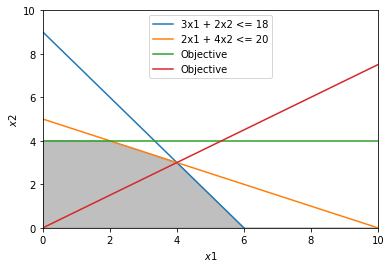

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Construct lines
x1 = np.linspace(0, 100, 100)
x2 = (18-3*x1)/2
x3 = (20-2*x1)/4
x4 = 300*x1/400
x5 = (x1*0)+4

# Make plot
plt.plot(x1, x2, label=r'3x1 + 2x2 <= 18')
plt.plot(x1, x3, label=r'2x1 + 4x2 <= 20')
plt.plot(x1, x5, label=r'Objective')
plt.plot(x1, x4, label=r'Objective')

plt.xlim((0, 10))
plt.ylim((0, 10))
plt.xlabel(r'$x1$')
plt.ylabel(r'$x2$')

# Fill feasible region
y3 = np.minimum(x2,x5)
y4 = np.minimum(x3,y3)

plt.fill_between(x1, y4, color='grey', alpha=0.5)
#plt.plot(obj)

plt.legend()

3b) Solve this model by using graphical analysis. Determine the range of profit per
necklace that leaves the current solution optimal using graphical analysis.

        As can be seen on the graph above, blue and orange lines represents the constraints. The grey area is the feasible area. In these kind of problems, edges of the area shows us the possible solutions. Red line represents the objective. Intersection of these 3 lines are the optimal solution, with x1=4 and x2=3.

    To determine the range, we might look at the points (2,4) and (6,0). When the profit is greater than 2400, solution would not be optimal. 2*(profit)+4*400. So when the profit per necklace is greater than 400 or equal to 0, jewelry store will choose to make different number of necklaces.